In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('new_sample_data.csv', encoding = "ISO-8859-1")
data.head()

,Product,complaint_what_happened
0,Debt collection,good morning name xxxx xxxx appreciate could h...
1,Credit card or prepaid card,upgraded xxxx xxxx card told agent upgrade ann...
2,"Credit reporting, credit repair services, or o...",chase card reported however fraudulent applica...
3,"Credit reporting, credit repair services, or o...",while trying book xxxx xxxx ticket came across...
4,Checking or savings account,grand give check deposit into chase account af...


In [4]:
data['Product'].value_counts()

Credit card or prepaid card                                                     5039
Checking or savings account                                                     4290
Mortgage                                                                        3246
Credit reporting, credit repair services, or other personal consumer reports    2087
Credit card                                                                     2070
Bank account or service                                                         1650
Debt collection                                                                  955
Money transfer, virtual currency, or money service                               797
Vehicle loan or lease                                                            403
Consumer Loan                                                                    240
Student loan                                                                     140
Money transfers                                                  

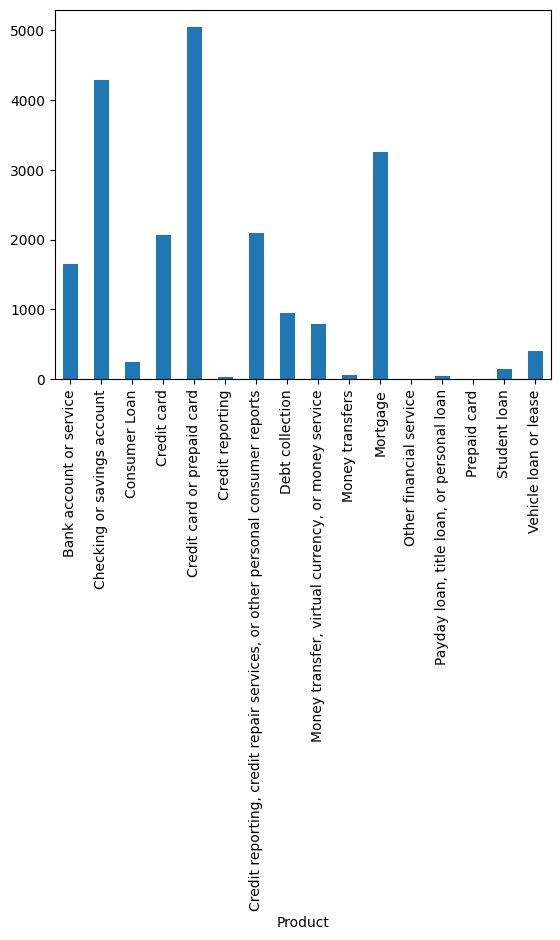

In [6]:
data.groupby('Product').complaint_what_happened.count().plot.bar()
plt.show()

In [7]:
data = data.sort_values(['Product'])
data

,Product,complaint_what_happened
5147,Bank account or service,received letters from chase after recent revie...
18411,Bank account or service,writing about chase bank refusal return that d...
18408,Bank account or service,obtained safe deposit chase bank appx xxxx cha...
18404,Bank account or service,have several accounts with morgan chase receiv...
18403,Bank account or service,opened account case about then after months th...
...,...,...
343,Vehicle loan or lease,xxxx negotiated second lease with xxxx xxxx xx...
7251,Vehicle loan or lease,credit account doesn belong report number jpmc...
7789,Vehicle loan or lease,started auto loan with xxxx xxxx xxxx xxxx xxx...
6412,Vehicle loan or lease,chase bank lost refinance check refinancing lo...


In [8]:
data['Product_no'] = data['Product'].factorize()[0]
data

,Product,complaint_what_happened,Product_no
5147,Bank account or service,received letters from chase after recent revie...,0
18411,Bank account or service,writing about chase bank refusal return that d...,0
18408,Bank account or service,obtained safe deposit chase bank appx xxxx cha...,0
18404,Bank account or service,have several accounts with morgan chase receiv...,0
18403,Bank account or service,opened account case about then after months th...,0
...,...,...,...
343,Vehicle loan or lease,xxxx negotiated second lease with xxxx xxxx xx...,15
7251,Vehicle loan or lease,credit account doesn belong report number jpmc...,15
7789,Vehicle loan or lease,started auto loan with xxxx xxxx xxxx xxxx xxx...,15
6412,Vehicle loan or lease,chase bank lost refinance check refinancing lo...,15


In [9]:
x = data['complaint_what_happened']
x

5147     received letters from chase after recent revie...
18411    writing about chase bank refusal return that d...
18408    obtained safe deposit chase bank appx xxxx cha...
18404    have several accounts with morgan chase receiv...
18403    opened account case about then after months th...
                               ...                        
343      xxxx negotiated second lease with xxxx xxxx xx...
7251     credit account doesn belong report number jpmc...
7789     started auto loan with xxxx xxxx xxxx xxxx xxx...
6412     chase bank lost refinance check refinancing lo...
1112     leased xxxx xxxx xxxx returned automobile xxxx...
Name: complaint_what_happened, Length: 21071, dtype: object

In [10]:
y = data['Product']
y

5147     Bank account or service
18411    Bank account or service
18408    Bank account or service
18404    Bank account or service
18403    Bank account or service
                  ...           
343        Vehicle loan or lease
7251       Vehicle loan or lease
7789       Vehicle loan or lease
6412       Vehicle loan or lease
1112       Vehicle loan or lease
Name: Product, Length: 21071, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
vector = vectorization.fit(x_train)
xv_train = vector.transform(x_train)
xv_test = vectorization.transform(x_test)

In [14]:
xv_train

<15803x23015 sparse matrix of type '<class 'numpy.float64'>'
	with 1290035 stored elements in Compressed Sparse Row format>

In [15]:
xv_test

<5268x23015 sparse matrix of type '<class 'numpy.float64'>'
	with 428740 stored elements in Compressed Sparse Row format>

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [19]:
LR = LR.fit(xv_train,y_train)

C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.6507213363705391

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_lr))

C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.41      0.09      0.14       423
                                                 Checking or savings account       0.63      0.84      0.72      1101
                                                               Consumer Loan       0.57      0.08      0.13        53
                                                                 Credit card       0.48      0.18      0.26       519
                                                 Credit card or prepaid card       0.62      0.83      0.71      1266
                                                            Credit reporting       0.00      0.00      0.00         9
Credit reporting, credit repair services, or other personal consumer reports       0.64      0.64      0.64       519
                                                       

C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mma\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.49411541381928625

In [ ]:
print(classification_report(y_test, pred_dt))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.23      0.21      0.22       415
                                                 Checking or savings account       0.53      0.54      0.54      1035
                                                               Consumer Loan       0.19      0.17      0.18        65
                                                                 Credit card       0.26      0.26      0.26       503
                                                 Credit card or prepaid card       0.56      0.57      0.56      1281
                                                            Credit reporting       0.00      0.00      0.00         9
Credit reporting, credit repair services, or other personal consumer reports       0.47      0.46      0.46       534
                                                       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest classfier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.615793470007593

In [ ]:
print(classification_report(y_test, pred_rfc))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.80      0.01      0.02       415
                                                 Checking or savings account       0.55      0.90      0.68      1035
                                                               Consumer Loan       1.00      0.03      0.06        65
                                                                 Credit card       0.38      0.01      0.02       503
                                                 Credit card or prepaid card       0.57      0.89      0.70      1281
                                                            Credit reporting       0.00      0.00      0.00         9
Credit reporting, credit repair services, or other personal consumer reports       0.63      0.60      0.62       534
                                                       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic regression has the best accuracy among other 2 models (66%)

Confusion matrix

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0, ha='right')
  plt.ylabel('Truth')
  plt.xlabel('Predicted')

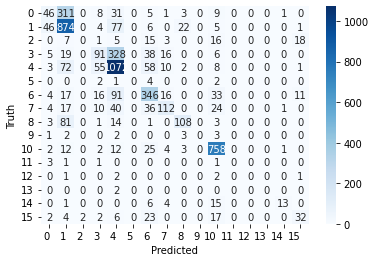

In [ ]:
cm = confusion_matrix(y_test, pred_lr)
df_cm = pd.DataFrame(cm)
show_confusion_matrix(df_cm)

Testing the model

In [26]:
def label_text(text, model, vect):
  text = vect.transform([text])
  return model.predict(text).flatten()[0]

In [27]:
text = 'I want to apply for new credit card'
label_text(text, LR, vectorization)

'Credit card'

In [22]:
import pickle
with open('final_model.pickle', 'wb')as f:
    pickle.dump(LR,f)

In [23]:
with open('vect.pickle', 'wb')as f:
    pickle.dump(vector,f)